## Understanding Data Statement
-  Given a dataset containing 15,000 images each for each variety of rice among Arborio, Basmati, Ipsala, Jasmine and Karacadag it was asked to build and train a model based on the features like texture, shape, and color So that it can predict the variety of rice grain .
-  CNN architectures that are being used here are  --- **Vanilla CNN**(A standard CNN architecture) ,  **VGG-16** (Feel free to use transfer learning)



### Extracting image folders from zip file placed in drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',timeout_ms=300000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/Rice_Image_Dataset/RCD.zip.zip'

import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/rice_varieties')

### Importing data

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

In [ ]:
dataset_folder = '/content/rice_varieties'

In [ ]:
# List to store image paths and corresponding labels
image_paths = []
labels = []

In [ ]:
for variety_folder in os.listdir(dataset_folder):
    variety_path = os.path.join(dataset_folder, variety_folder)

    # Loop through each image in the variety folder
    for image_file in os.listdir(variety_path):
        image_path = os.path.join(variety_path, image_file)

        # Use OpenCV to read the image
        image = cv2.imread(image_path)

        # Check if the image is successfully read
        if image is not None:
            # Resize the image
            image = cv2.resize(image, (128, 128))

            # Append the image path and label to the lists
            image_paths.append(image_path)
            labels.append(variety_folder)
        else:
            print(f"Warning: Unable to read image at {image_path}")

In [ ]:
# Create a DataFrame to store image paths and labels
data = pd.DataFrame({'image_path': image_paths, 'label': labels})

In [ ]:
# Display the first few rows of the DataFrame
print(data.head())

                                          image_path    label
0  /content/rice_varieties/Basmati/basmati (12138...  Basmati
1  /content/rice_varieties/Basmati/basmati (13943...  Basmati
2  /content/rice_varieties/Basmati/basmati (9253)...  Basmati
3  /content/rice_varieties/Basmati/basmati (10391...  Basmati
4  /content/rice_varieties/Basmati/basmati (8208)...  Basmati


In [ ]:
data.shape

(75000, 2)

In [ ]:
import os
import pandas as pd

invalid_filenames = []

for idx, row in data.iterrows():
    image_path = row['image_path']
    if not os.path.isfile(image_path):
        invalid_filenames.append(image_path)

In [ ]:
len(invalid_filenames)

0

## converting the dataset containing paths and labels into .csv and storing in drive

In [ ]:
csv_path = '/content/riceImagePaths.csv'

# Save the DataFrame to a CSV file
data.to_csv(csv_path, index=False)

print(f'Dataset saved to {csv_path}')

Dataset saved to /content/riceImagePaths.csv


In [ ]:
dataset = pd.read_csv(csv_path)
dataset.shape

(75000, 2)

In [ ]:
len(dataset[dataset.label=='Arborio'])

15000

In [ ]:
len(dataset[dataset.label=='Basmati'])

15000

In [ ]:
len(dataset[dataset.label=='Ipsala'])

15000

In [ ]:
len(dataset[dataset.label=='Jasmine'])

15000

In [ ]:
len(dataset[dataset.label=='Karacadag'])

15000

### Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset.head(3)

,image_path,label
0,/content/rice_varieties/Basmati/basmati (12138...,Basmati
1,/content/rice_varieties/Basmati/basmati (13943...,Basmati
2,/content/rice_varieties/Basmati/basmati (9253)...,Basmati


In [ ]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.1, random_state=32)

In [ ]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(train_data , test_size=0.1, random_state=32)

In [ ]:
# Create an ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    shear_range=0.2,           # Shear intensity
    zoom_range=0.2,            # Zoom range
    horizontal_flip=True       # Horizontal flip
)

In [ ]:
# Create an ImageDataGenerator for validation data (only normalization)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create an ImageDataGenerator for test data (only normalization)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Define batch size
batch_size = 32

In [ ]:
image_size = (128,128)

In [ ]:
# Create the train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 60750 validated image filenames belonging to 5 classes.


In [ ]:
# Create the validation generator
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'   # Use 'categorical' for multi-class classification
)

Found 6750 validated image filenames belonging to 5 classes.


In [ ]:
# Create the validation generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='image_path',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'   # Use 'categorical' for multi-class classification
)

Found 6750 validated image filenames belonging to 5 classes.


In [ ]:
train_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
val_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
test_generator.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [ ]:
next(train_generator)[0].shape

(32, 128, 128, 3)

In [ ]:
next(train_generator)[1].shape

(32, 5)

In [ ]:
next(val_generator)[0].shape

(32, 128, 128, 3)

In [ ]:
next(val_generator)[1].shape

(32, 5)

In [ ]:
next(test_generator)[0].shape

(32, 128, 128, 3)

In [ ]:
next(test_generator)[1].shape

(32, 5)

In [ ]:
import matplotlib.pyplot as plt

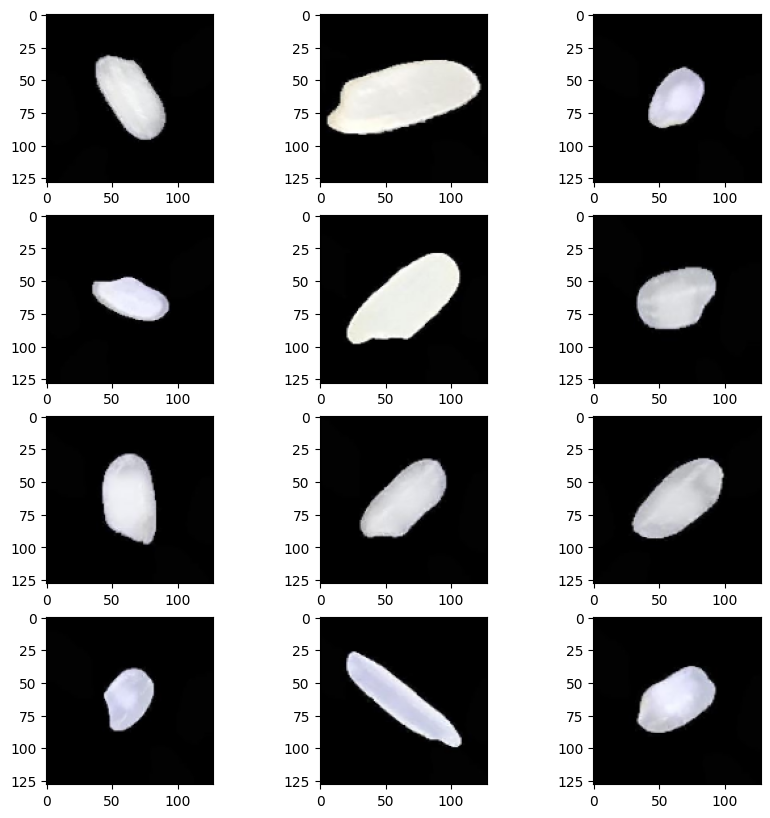

In [ ]:
plt.figure(figsize = (10,10))
for idx,each_batch in enumerate(train_generator,1):  # starting idx from 1
  img = each_batch[0][0]
  plt.subplot(4,3,idx) # here considering idx as position
  plt.imshow(img)
  if idx >= 12:
    break

### Building a model using Vanilla CNN architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model_vanilla = Sequential()

In [ ]:
# Convolutional layer 1
model_vanilla.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model_vanilla.add(MaxPooling2D((2, 2)))

In [ ]:
# Convolutional layer 2
model_vanilla.add(Conv2D(64, (3, 3), activation='relu'))
model_vanilla.add(MaxPooling2D((2, 2)))

In [ ]:
# Convolutional layer 3
model_vanilla.add(Conv2D(128, (3, 3), activation='relu'))
model_vanilla.add(MaxPooling2D((2, 2)))

In [ ]:
# Flatten layer
model_vanilla.add(Flatten())

In [ ]:
# Dense layers
model_vanilla.add(Dense(128, activation='relu'))
model_vanilla.add(Dropout(0.2))  # Adding dropout for regularization
model_vanilla.add(Dense(5, activation='softmax'))  # Assuming 5 classes for 5 rice varieties

In [ ]:
# Compile the model
model_vanilla.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display the model summary
model_vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
from tensorflow.keras.utils import plot_model

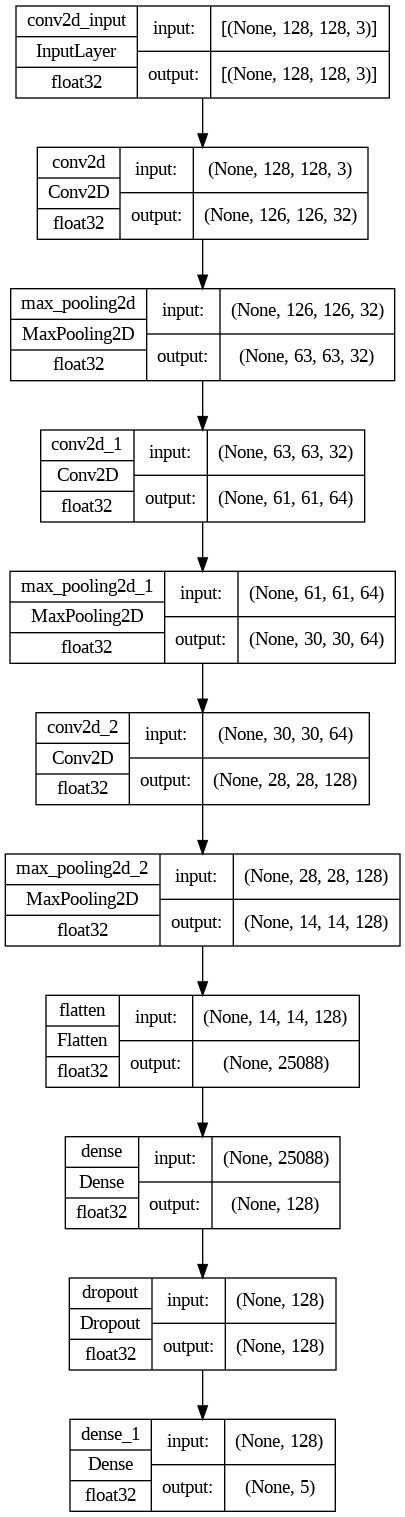

In [ ]:
plot_model(model_vanilla , show_shapes = True , show_dtype = True)

## Training the model_vanilla

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Define the path to save the best model
model_checkpoint_path = '/content/best_CNNmodel_Vanilla.h5'

In [ ]:
# Create the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=model_checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
# Train the model with ModelCheckpoint callback
history = model_vanilla.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator),
    epochs=2,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[model_checkpoint]  # Include the ModelCheckpoint callback
)

<ipython-input-56-cc6995cf37e3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_vanilla.fit_generator(


Epoch 1/2
1899/1899 [==============================] - ETA: 0s - loss: 0.1935 - accuracy: 0.9264
Epoch 1: val_accuracy improved from -inf to 0.99037, saving model to /content/best_CNNmodel_Vanilla.h5
1899/1899 [==============================] - 2180s 1s/step - loss: 0.1935 - accuracy: 0.9264 - val_loss: 0.0287 - val_accuracy: 0.9904


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/2
1899/1899 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9787
Epoch 2: val_accuracy did not improve from 0.99037
1899/1899 [==============================] - 2145s 1s/step - loss: 0.0648 - accuracy: 0.9787 - val_loss: 0.2012 - val_accuracy: 0.9361


## Evaluating the model_vanilla

### Evaluating model_vanilla on train data

In [ ]:
# predictions on train data
train_result = model_vanilla.evaluate(train_generator, steps=len(train_generator))

1899/1899 [==============================] - 795s 418ms/step - loss: 0.0459 - accuracy: 0.9847


In [ ]:
train_result

[0.04591057449579239, 0.984674870967865]

In [ ]:
train_true = train_generator.classes
len(train_true)

60750

In [ ]:
predictions = model_vanilla.predict(train_generator, steps=len(train_generator))
train_pred = np.argmax(predictions,axis=1)

1899/1899 [==============================] - 796s 419ms/step


In [ ]:
import numpy as np

In [ ]:
train_pred = np.argmax(predictions,axis=1)

In [ ]:
len(train_pred)

60750

In [ ]:
# Confusion matrix for training data predictions
conf_matrix_train = confusion_matrix(train_true, train_pred)

# Classification report
class_report_train = classification_report(train_true, train_pred, target_names = train_generator.class_indices.keys())

# Print evaluation results
print("Evaluation Results on train data :")
print("Loss:", train_result[0])
print("Accuracy:", train_result[1])

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(conf_matrix_train)

print("\nClassification Report:")
print(class_report_train)

Evaluation Results on train data :
Loss: 0.04591057449579239
Accuracy: 0.984674870967865

Confusion Matrix:
[[2488 2382 2459 2507 2426]
 [2411 2366 2459 2387 2430]
 [2461 2315 2411 2489 2472]
 [2423 2399 2448 2450 2377]
 [2503 2330 2455 2399 2503]]

Classification Report:
              precision    recall  f1-score   support

     Arborio       0.20      0.20      0.20     12262
     Basmati       0.20      0.20      0.20     12053
      Ipsala       0.20      0.20      0.20     12148
     Jasmine       0.20      0.20      0.20     12097
   Karacadag       0.21      0.21      0.21     12190

    accuracy                           0.20     60750
   macro avg       0.20      0.20      0.20     60750
weighted avg       0.20      0.20      0.20     60750



#### Evaluating the model_vanilla on validation data

In [ ]:
# predictions on validation data
val_result = model_vanilla.evaluate(val_generator, steps=len(val_generator))

val_true = val_generator.classes
predictions = model_vanilla.predict(val_generator, steps=len(val_generator))
val_pred = np.argmax(predictions,axis=1)

# Confusion matrix for validation data predictions
conf_matrix_val = confusion_matrix(val_true, val_pred)

# Classification report
class_report_val = classification_report(val_true, val_pred, target_names=val_generator.class_indices.keys())

# Print evaluation results
print("Evaluation Results on validation data :")
print("Loss:", val_result[0])
print("Accuracy:", val_result[1])

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(conf_matrix_val)

print("\nClassification Report:")
print(class_report_val)

211/211 [==============================] - 67s 318ms/step
Evaluation Results on validation data :
Loss: 0.20122098922729492
Accuracy: 0.9361481666564941

Confusion Matrix:
[[197 242 295 267 258]
 [249 277 358 272 266]
 [235 248 315 264 261]
 [221 275 311 315 278]
 [203 258 328 296 261]]

Classification Report:
              precision    recall  f1-score   support

     Arborio       0.18      0.16      0.17      1259
     Basmati       0.21      0.19      0.20      1422
      Ipsala       0.20      0.24      0.22      1323
     Jasmine       0.22      0.23      0.22      1400
   Karacadag       0.20      0.19      0.20      1346

    accuracy                           0.20      6750
   macro avg       0.20      0.20      0.20      6750
weighted avg       0.20      0.20      0.20      6750



#### Evaluating the model_vanilla on test data

In [ ]:
# predictions on testing data
test_result = model_vanilla.evaluate(test_generator, steps=len(test_generator))

test_true = test_generator.classes
predictions = model_vanilla.predict(test_generator, steps=len(test_generator))
test_pred = np.argmax(predictions,axis=1)

# Confusion matrix for validation data predictions
conf_matrix_test = confusion_matrix(test_true, test_pred)

# Classification report
class_report_test = classification_report(test_true, test_pred, target_names=test_generator.class_indices.keys())

# Print evaluation results
print("Evaluation Results on testing data :")
print("Loss:", test_result[0])
print("Accuracy:", test_result[1])

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(conf_matrix_test)

print("\nClassification Report:")
print(class_report_test)

211/211 [==============================] - 63s 299ms/step
Evaluation Results on testing data :
Loss: 0.20122098922729492
Accuracy: 0.9361481666564941

Confusion Matrix:
[[202 230 299 271 257]
 [243 283 334 301 261]
 [198 255 307 282 281]
 [226 275 327 287 285]
 [236 257 340 273 240]]

Classification Report:
              precision    recall  f1-score   support

     Arborio       0.18      0.16      0.17      1259
     Basmati       0.22      0.20      0.21      1422
      Ipsala       0.19      0.23      0.21      1323
     Jasmine       0.20      0.20      0.20      1400
   Karacadag       0.18      0.18      0.18      1346

    accuracy                           0.20      6750
   macro avg       0.20      0.19      0.19      6750
weighted avg       0.20      0.20      0.19      6750



In [ ]:
print('train accuracy : ',train_result[1])
print('validation accuracy : ',val_result[1])
print('test accuracy : ',test_result[1])

train accuracy :  0.984674870967865
validation accuracy :  0.9361481666564941
test accuracy :  0.9361481666564941


### VGG16 Model building

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
# VGG-16 model with fine-tuning
vgg16_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze layers from the pre-trained model
for layer in vgg16_base_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model on top
vgg16_finetuned_model = Sequential()
vgg16_finetuned_model.add(vgg16_base_model)
vgg16_finetuned_model.add(Flatten())
vgg16_finetuned_model.add(Dense(256, activation='relu'))
vgg16_finetuned_model.add(Dense(5, activation='softmax'))

In [ ]:
# Compile the VGG-16 finetuned model
vgg16_finetuned_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
vgg16_finetuned_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 16813381 (64.14 MB)
Trainable params: 2098693 (8.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
checkpoint_path = '/content/best_VGG16_model.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
# Train the VGG-16 finetuned model
vgg16_finetuned_model.fit_generator(train_generator,
                                    steps_per_epoch=len(train_generator),
                                    epochs=1,
                                    validation_data=val_generator,
                                    validation_steps=len(val_generator),
                                    callbacks=[checkpoint])

<ipython-input-75-7031da49d030>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16_finetuned_model.fit_generator(train_generator,


1899/1899 [==============================] - ETA: 0s - loss: 0.1324 - accuracy: 0.9512
Epoch 1: val_loss improved from inf to 0.04181, saving model to /content/best_VGG16_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1899/1899 [==============================] - 12752s 7s/step - loss: 0.1324 - accuracy: 0.9512 - val_loss: 0.0418 - val_accuracy: 0.9859


In [ ]:
''' from tensorflow.keras.models import load_model

# Specify the path to the uploaded .h5 file
model_path = '/content/best_VGG16_model.h5'

# Load the model
vgg16_finetuned_model = load_model(model_path) '''

" from tensorflow.keras.models import load_model\n\n# Specify the path to the uploaded .h5 file\nmodel_path = '/content/best_VGG16_model.h5'\n\n# Load the model\nvgg16_finetuned_model = load_model(model_path) "

In [ ]:
# Evaluate the VGG-16 finetuned model on the train set
vgg16_finetuned_train_result = vgg16_finetuned_model.evaluate(train_generator, steps=len(train_generator))

train_true = train_generator.classes

# Make predictions with the VGG-16 finetuned model -- for train data
vgg16_finetuned_predictions = vgg16_finetuned_model.predict(train_generator, steps=len(train_generator))
vgg16_finetuned_pred_labels = np.argmax(vgg16_finetuned_predictions, axis=1)

# Confusion matrix for VGG-16 finetuned model -- for train data
vgg16_finetuned_conf_matrix = confusion_matrix(train_true, vgg16_finetuned_pred_labels)

# Classification report for VGG-16 finetuned model -- for train data
vgg16_finetuned_class_report = classification_report(train_true, vgg16_finetuned_pred_labels)

# Print evaluation results for VGG-16 finetuned model -- for train data
print("\n\nEvaluation Results for test data -- VGG-16 Finetuned:")
print("Loss:", vgg16_finetuned_train_result[0])
print("Accuracy:", vgg16_finetuned_train_result[1])

print("\nConfusion matrix : \n")
print(vgg16_finetuned_conf_matrix)

print("\Classification Report : \n")
print(vgg16_finetuned_class_report)

1899/1899 [==============================] - 11400s 6s/step


Evaluation Results for test data -- VGG-16 Finetuned:
Loss: 0.06716436892747879
Accuracy: 0.975786030292511

Confusion matrix : 

[[2415 2371 2458 2492 2526]
 [2356 2257 2397 2534 2509]
 [2480 2281 2405 2541 2441]
 [2429 2284 2428 2523 2433]
 [2381 2278 2416 2580 2535]]
\Classification Report : 

              precision    recall  f1-score   support

           0       0.20      0.20      0.20     12262
           1       0.20      0.19      0.19     12053
           2       0.20      0.20      0.20     12148
           3       0.20      0.21      0.20     12097
           4       0.20      0.21      0.21     12190

    accuracy                           0.20     60750
   macro avg       0.20      0.20      0.20     60750
weighted avg       0.20      0.20      0.20     60750



### Evaluated the VGG16 model in ` VGG16modelEval.ipynb `  file but concluded some points here .

## Observarions :       

-  As the provided data is equally balanced among all classes and already in gray scale both the vanilla CNN and VGG16 models built on the given data performed very well with really good accuracy .
-  Also when this data considered in real time it is not so necessary to use VGG16 model , the traditional CNN model itself is sufficient , considering the depth of the VGG16 network and also it is taking more time to get trained than the vanilla CNN model .
-  Also when the best models of each network were saved VGG16 model occupied nearly 2 times the memory that was occupied by vanilla CNN model . So as performance already good with vanilla CNN model it will be sufficient .
-  Also with the given dataset over fitting chances are high in both models so it is better to add a regularization layer like Dropout layer .
-  In future scope some more wide varieties of rice grain images can be included in the dataset adding even more classes so that in real time the rice grain quality and class can be easily predicted .

##  Conclusion :    

-  By accurately classifying rice varieties , the system can assist in seed selection and breeding programs , aiding farmers and researchers in developing improved and high-yielding rice varieties .
-  Ensuring the accuracy of rice labeling and packaging helps maintain food safety standards and provides consumers with assurance about the authenticity and quality of the city they purchase .